In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [4]:
def convert_month(month: str) -> int:
    month_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    }
    return month_dict[month]

In [5]:
def convert_day(day: str) -> int:
    day_dict = {
        "sun": 0,
        "mon": 1,
        "tue": 2,
        "wed": 3,
        "thu": 4,
        "fri": 5,
        "sat": 6
    }
    return day_dict[day]

In [6]:
df["day"] = df["day"].apply(convert_day)

In [7]:
df["month"] = df["month"].apply(convert_month)

Cau 1

In [8]:
#Chia du lieu train va set
X = df.to_numpy()[:, :-1]
y = df.to_numpy()[:, -1]
X_train, X_test = np.split(X, [int(0.8 * len(X))])
y_train, y_test = np.split(y, [int(0.8 * len(y))])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 12), (104, 12), (413,), (104,))

In [9]:
class LinearRegression:
    def init(self): #Tao trong so
        self.theta = None
    def fit(self, X: np.ndarray, y: np.ndarray)->None: #OLS
        cov = np.matmul(X.T,X)
        inv_cov = np.linalg.inv(cov) #Ma tran nghich dao
        self.theta = inv_cov @ (X.T @ y) #Tinh trong so
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float: #Tinh RMSE
        delta = y - y_hat
        return np.square(delta).mean()**0.5
    def predict(self,X):
        y_pred = np.matmul(self.theta.T,X.T)
        return y_pred

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.rmse(y_test,y_pred)

np.float64(79.42477263962971)

In [11]:
lr.theta

array([ 0.93387474, -0.3472708 ,  2.97274599,  1.69617548, -0.08518378,
        0.11686352, -0.02830015, -0.88678297,  0.43970684, -0.18297875,
        0.04626583, -6.54744483])

Cau 2

In [13]:
Norm_XTrain = X_train.copy()
Norm_XTest = X_test.copy()
Norm_XTrain[:,4:12] = (X_train[:,4:12] - X_train[:,4:12].mean(axis = 0)) / X_train[:,4:12].std(axis = 0)
Norm_XTest[:,4:12] = (X_test[:,4:12] - X_train[:,4:12].mean(axis = 0)) / X_test[:,4:12].std(axis = 0)

In [20]:
lr2 = LinearRegression()
lr2.fit(Norm_XTrain,y_train)
y_pred = lr2.predict(Norm_XTest)
lr2.rmse(y_test, y_pred)

np.float64(79.4815831152267)

In [22]:
lr2.theta

array([ 0.84186217, -0.77498961,  0.88344175,  1.4512355 , -0.03702466,
        5.50145196, -1.93438588, -4.06052164,  1.88764502, -3.17832566,
        0.67137735, -0.40246184])

Sau khi chuẩn hóa, mất mát của mô hình giảm đi

Cau 3

In [23]:
Corr_df = df.drop(columns = ['X','Y','month','day'])
Corr_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

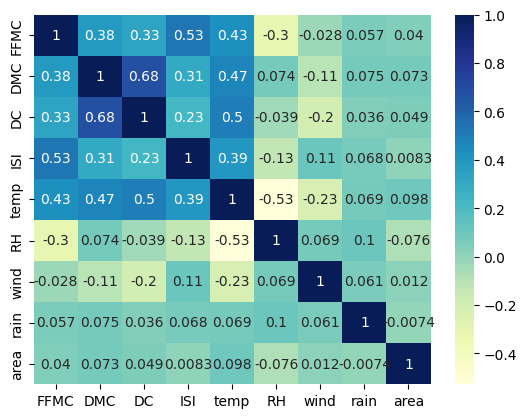

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp
print(Corr_df.corr())
plot = sb.heatmap(Corr_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
mp.show()

Ta nhận thấy giữa DC và DMC có tính colinearity khá cao nên có thể xóa 1 trong 2

In [26]:
Norm_XTrain = np.delete(Norm_XTrain,6,1)
Norm_XTest = np.delete(Norm_XTest,6,1)
Norm_XTrain.shape,Norm_XTest.shape

((413, 11), (104, 11))

In [27]:
lr3 = LinearRegression()
lr3.fit(Norm_XTrain,y_train)
y_pred = lr3.predict(Norm_XTest)
lr3.rmse(y_test,y_pred)

np.float64(79.49958075688257)

In [28]:
lr3.theta

array([ 0.84191429, -0.27992357,  0.54969613,  1.53641624, -0.08061569,
        4.88838834, -4.01471724,  1.42510144, -3.44769596,  0.82691859,
       -0.36062898])

Cau 4

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
print(lin_reg.coef_)

79.42477263962972
[ 0.93387474 -0.3472708   2.97274599  1.69617548 -0.08518378  0.11686352
 -0.02830015 -0.88678297  0.43970684 -0.18297875  0.04626583 -6.54744483]
